# Bitcoin Example Notebook
**Generated:** May 14, 2025

This notebook demonstrates an end-to-end application using all components from `bitcoin_utils.py`.

Steps:
1. Fetch or load data
2. Store to and load from S3
3. Preprocess
4. Visualize
5. Forecast
6. Detect anomalies
7. Save results

In [8]:
from bitcoin_utils import (
    fetch_bitcoin_data,
    save_to_local,
    upload_to_s3,
    load_from_s3,
    preprocess_data,
    check_missing,
    plot_price,
    decompose_series,
    plot_moving_average,
    forecast_arima,
    detect_anomalies
)

import pandas as pd

## Step 1: Load Existing Bitcoin Data

In [10]:
# If API fetch is implemented, use it here
# api_key = "CG-5pibUvyXCBs3EpUFkQg3nDoX"
# df = fetch_bitcoin_data(api_key=api_key)

df = pd.read_csv("bitcoin_prices.csv")
save_to_local(df, "bitcoin_prices.csv")
upload_to_s3("bitcoin_prices.csv", "bitcoin-timeseries-data-kv/bitcoin_prices.csv")

✅ Data saved locally as bitcoin_prices.csv
✅ bitcoin_prices.csv uploaded to S3 at bitcoin-timeseries-data-kv/bitcoin_prices.csv


## Step 2: Load from S3 and Preprocess

In [12]:
df = load_from_s3("bitcoin-timeseries-data-kv/bitcoin_prices.csv")
df = preprocess_data(df)
check_missing(df)

✅ Successfully loaded data from S3
✅ Data preprocessed (timestamp set as index)
✅ Missing Values Check:
Price    0
dtype: int64


## Step 3: Time Series Visualization and Decomposition

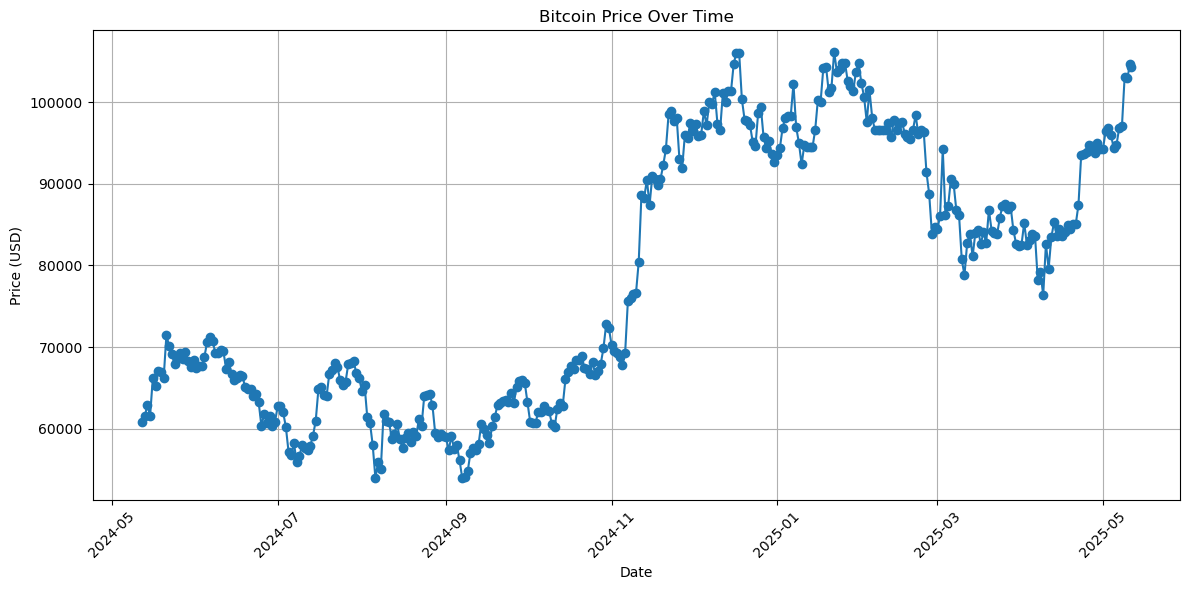

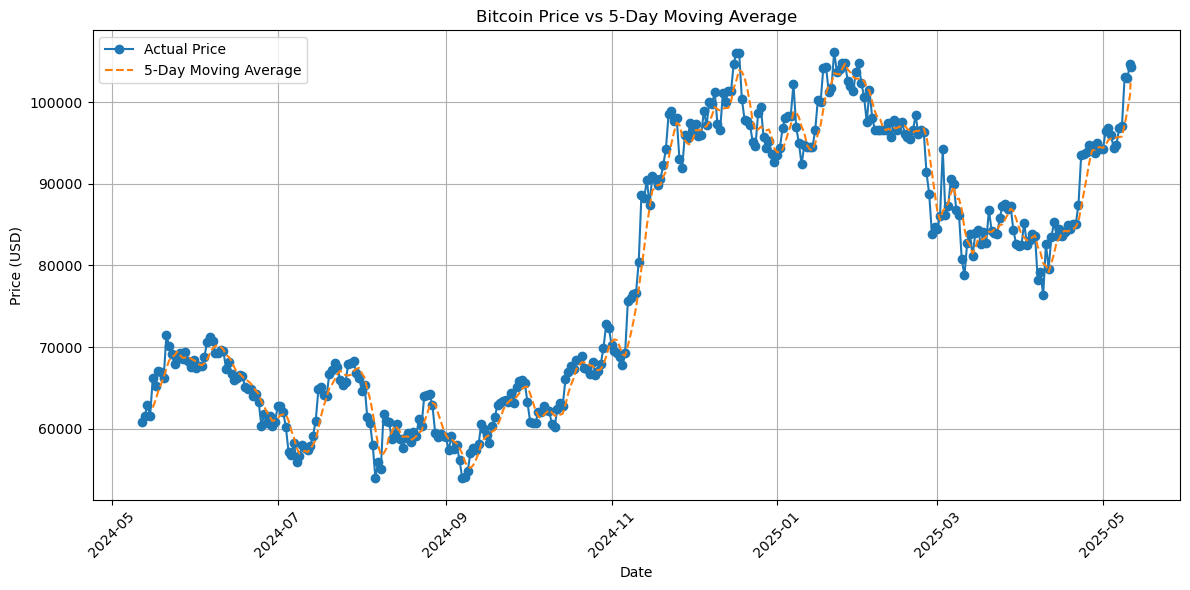

<Figure size 1200x800 with 0 Axes>

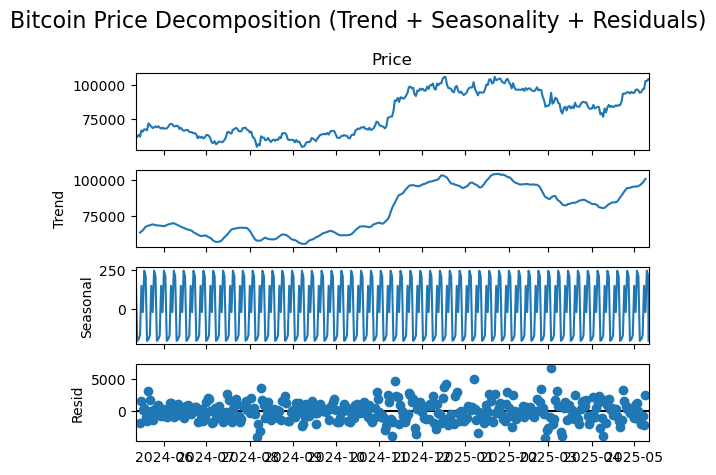

In [14]:
plot_price(df)
plot_moving_average(df, window_size=5)
decompose_series(df)

## Step 4: Forecasting with ARIMA

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


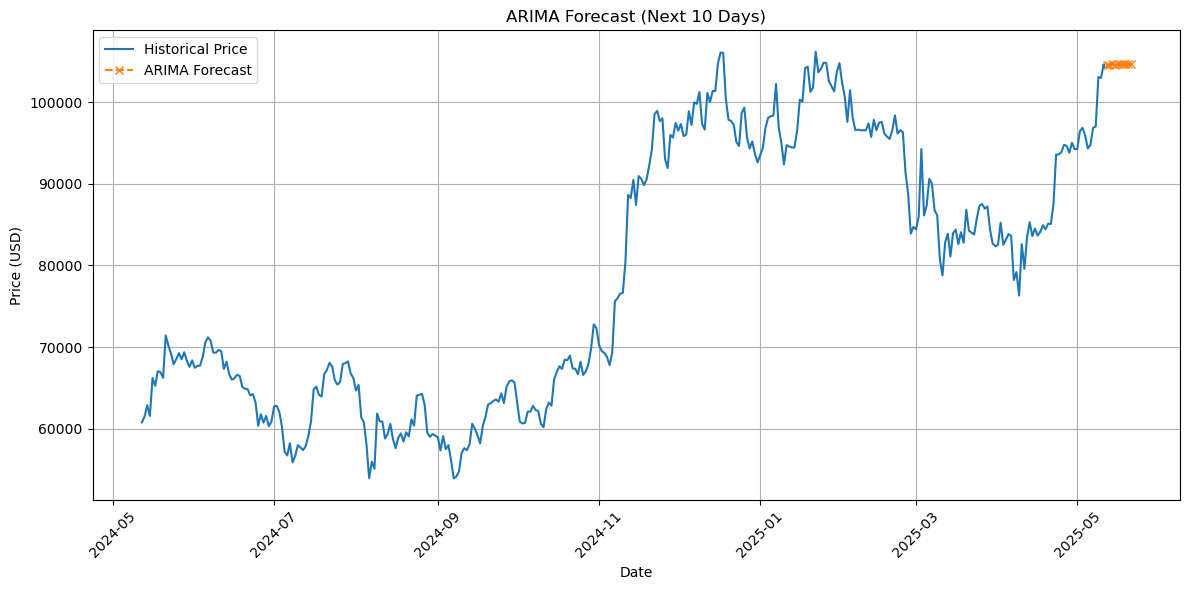

In [16]:
forecast_arima(df, steps=10)

## Step 5: Detecting Anomalies

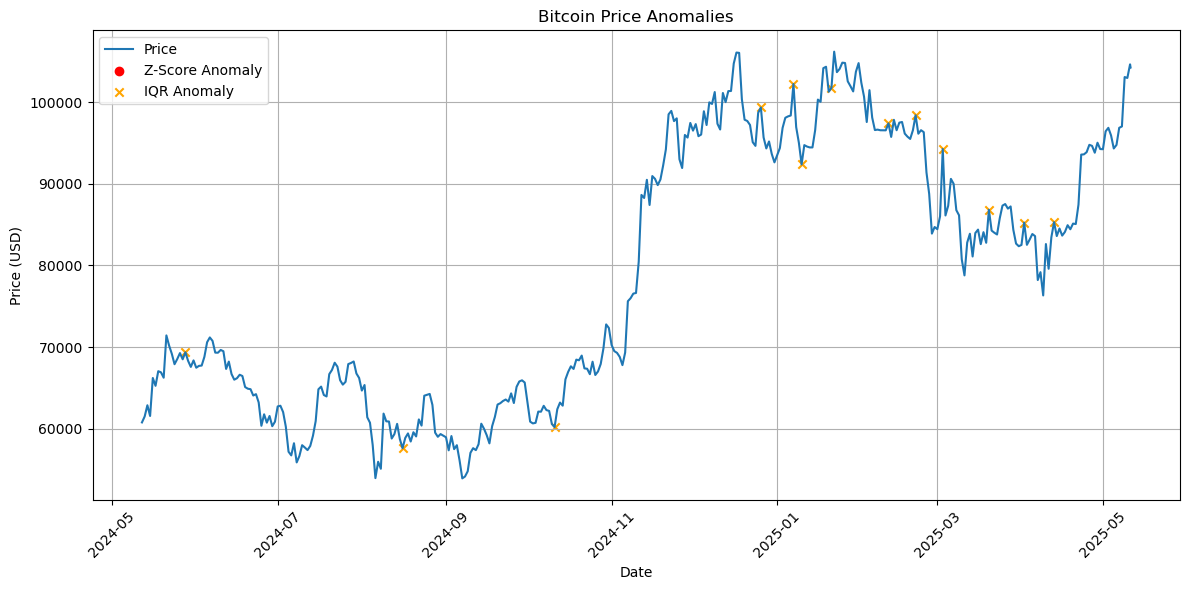

In [18]:
df_with_anomalies = detect_anomalies(df)

## Step 6: Save and Upload Final Data

In [20]:
df_with_anomalies.to_csv("bitcoin_prices_final.csv")
upload_to_s3("bitcoin_prices_final.csv", "bitcoin-timeseries-data-kv/bitcoin_prices_final.csv")

✅ bitcoin_prices_final.csv uploaded to S3 at bitcoin-timeseries-data-kv/bitcoin_prices_final.csv
